In [117]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [118]:
# Read csv files
covid_df = pd.read_csv('Output Data/completedata.csv', index_col=[0])
covid_df.head()

,State,Population,Poverty Rate,Year,Unemployment Rate,Total Cases,Total Deaths
0,Alabama,4903185,12.9,2019,2.99,142863,2428
1,Alaska,731545,10.2,2019,6.13,6658,45
2,Arizona,7278717,9.9,2019,4.69,212942,5451
3,Arkansas,3017804,14.1,2019,3.55,74082,1173
4,California,39512223,10.1,2019,4.05,769831,14812


In [119]:
# Create lists for medicaid expansion factor

implemented = ['Colorado', 'Arizona', 'Connecticut', 'Kentucky', 'Iowa', 'New Mexico', 'North Dakota','Washington', 
               'Massachusetts', 'Pennsylvania', 'Ohio', 'Michigan', 'Virginia', 'California', 'New Jersey', 'Illinois', 
               'Louisiana', 'New York', 'Nevada','Indiana', 'Oregon', 'Maryland','Idaho','Utah', 'Arkansas', 
               'Delaware', 'Minnesota', 'West Virginia', 'Rhode Island', 'District of Columbia', 'Maine',
               'New Hampshire', 'Hawaii', 'Montana', 'Alaska', 'Vermont']
adopted = ['Missouri', 'Nebraska', 'Oklahoma']
no_action = ['Wisconsin', 'South Dakota', 'Wyoming', 'Kansas', 'Texas','Tennessee', 'North Carolina', 'South Carolina', 
             'Georgia', 'Florida', 'Alabama', 'Mississippi']


In [120]:
# Create column with deaths per 100,000 people
deaths = (covid_df['Total Deaths']/ covid_df['Population'])* 100000
covid_df['Deaths per 100,000'] = deaths

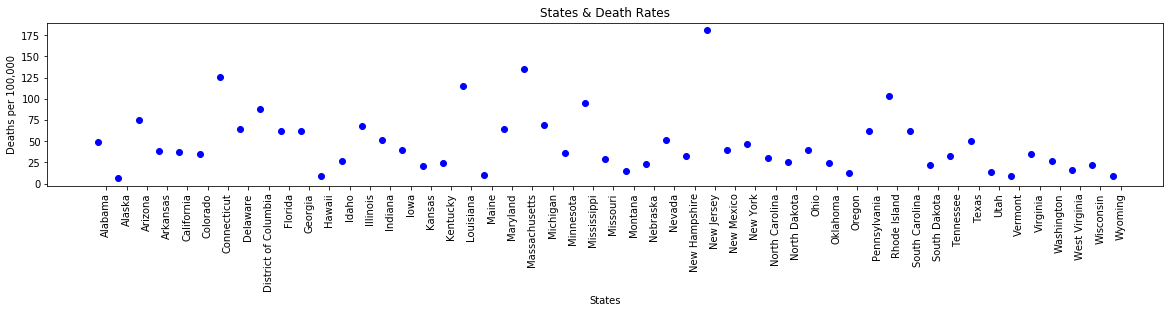

In [151]:
x_axis = np.arange(len(covid_df))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.scatter(x_axis, covid_df["Deaths per 100,000"], color='b', marker='o')
plt.xticks(tick_locations, covid_df["State"], rotation="vertical")
plt.xlabel('States')
plt.ylabel('Deaths per 100,000')
plt.title('States & Death Rates')
plt.show()

The correlation between both factors is 0.21


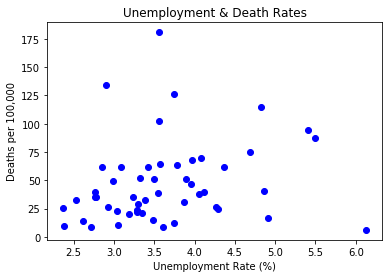

In [154]:
unemploy_rates = covid_df['Unemployment Rate']
correlation = st.pearsonr(unemploy_rates,deaths)
plt.scatter(unemploy_rates, deaths, color='b')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Deaths per 100,000')
plt.title('Unemployment & Death Rates')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

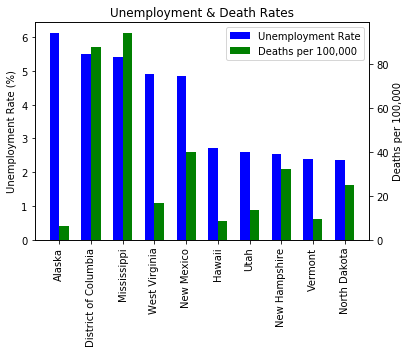

In [153]:
unemploy_rates = unemploy_rates.sort_values(ascending=False)
unemploy_max = unemploy_rates[0:5]
unemploy_min = unemploy_rates[-5:]

state_max = covid_df.iloc[unemploy_max.index]
state_min = covid_df.iloc[unemploy_min.index]
extremes = [state_max, state_min]
extremes_df = pd.concat(extremes)
extremes_df

x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x + w /2, extremes_df['State'], rotation='vertical')
ploy =ax1.bar(x, extremes_df['Unemployment Rate'], width=w, color='b', align='center')
plt.ylabel('Unemployment Rate (%)')
ax2 = ax1.twinx()
d_rate =ax2.bar(x + w, extremes_df['Deaths per 100,000'], width=w,color='g',align='center')
plt.ylabel('Deaths per 100,000')
plt.title('Unemployment & Death Rates')
plt.legend([ploy, d_rate],['Unemployment Rate','Deaths per 100,000'])
plt.show()

The correlation between both factors is 0.09


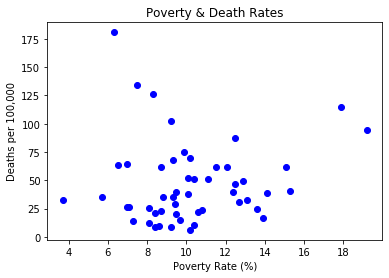

In [155]:
poverty_rates = covid_df['Poverty Rate']
correlation_pov = st.pearsonr(poverty_rates,deaths)
plt.scatter(poverty_rates, deaths, color='b')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Deaths per 100,000')
plt.title('Poverty & Death Rates')
print(f"The correlation between both factors is {round(correlation_pov[0],2)}")
plt.show()

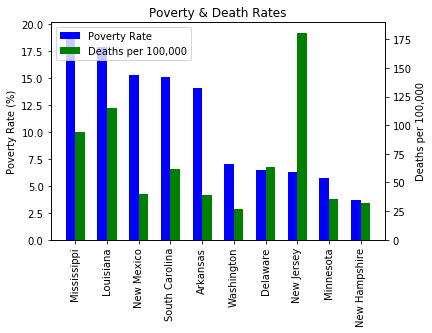

In [156]:
poverty_rates = poverty_rates.sort_values(ascending=False)
poverty_max = poverty_rates[0:5]
poverty_min = poverty_rates[-5:]

state_max_pov = covid_df.iloc[poverty_max.index]
state_min_pov = covid_df.iloc[poverty_min.index]
extremes = [state_max_pov, state_min_pov]
pov_extremes_df = pd.concat(extremes)
pov_extremes_df


x = np.arange(10)
ax1_pov= plt.subplot(1,1,1)
w = 0.3
plt.xticks(x + w /2, pov_extremes_df['State'], rotation='vertical')
pov =ax1_pov.bar(x, pov_extremes_df['Poverty Rate'], width=w, color='b', align='center')
plt.ylabel('Poverty Rate (%)')
ax2_pov = ax1_pov.twinx()
d_rate_pov =ax2_pov.bar(x + w, pov_extremes_df['Deaths per 100,000'], width=w,color='g',align='center')
plt.ylabel('Deaths per 100,000')
plt.title('Poverty & Death Rates')
plt.legend([pov, d_rate_pov],['Poverty Rate','Deaths per 100,000'])
plt.show()


In [125]:
#state_index_df = covid_df.set_index('State')

implement_df = state_index_df.loc[implemented,['Deaths per 100,000']]
adopted_df = state_index_df.loc[adopted, ['Deaths per 100,000']]
no_action_df = state_index_df.loc[no_action, ['Deaths per 100,000']]


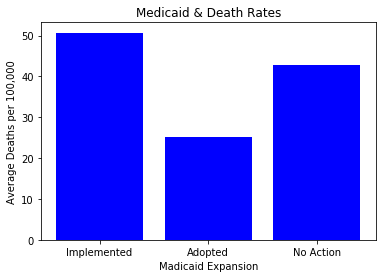

In [157]:
avg_implement = implement_df['Deaths per 100,000'].mean()
avg_adopted = adopted_df['Deaths per 100,000'].mean()
avg_no_action = no_action_df['Deaths per 100,000'].mean()

x_values = ['Implemented', 'Adopted', 'No Action']
y_values = [avg_implement, avg_adopted, avg_no_action]
plt.bar(x_values, y_values, color='b')
plt.xlabel('Madicaid Expansion')
plt.ylabel('Average Deaths per 100,000')
plt.title('Medicaid & Death Rates')
plt.show()